In [39]:
import pandas as pd
import numpy as np
from scipy import stats
from pandas import DataFrame
import seaborn
import glob
import os
import urllib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib import style
import datetime as dt
from dateutil import parser
import json
import requests
%matplotlib inline

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [40]:
style.use('fivethirtyeight')
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


In [41]:
print(plt.__file__)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py


In [42]:
path_1 = r'/Users/Cottins/Documents/_Code/Proctor and Gamble'
all_files_pg = glob.glob(os.path.join(path_1, '*.csv'))

df_from_each_file_pg = (pd.read_csv(f) for f in all_files_pg)

concatenated_df_pg = pd.concat(df_from_each_file_pg, ignore_index=True)
concatenated_df_pg.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,29-Dec-17,92.239998,92.459999,91.879997,91.879997,4346700,91.184853
1,28-Dec-17,92.300003,92.540001,91.910004,92.070000,3005400,91.373413
2,27-Dec-17,92.489998,92.750000,91.930000,92.099998,4276700,91.403191
3,26-Dec-17,92.349998,92.769997,92.150002,92.480003,3431900,91.780319
4,22-Dec-17,91.879997,92.430000,91.720001,92.129997,4919400,91.432961


In [43]:
concatenated_df_pg['Date'] = pd.to_datetime(concatenated_df_pg['Date'])
concatenated_df_pg = concatenated_df_pg.sort_values(by='Date')

In [44]:
govt_2013sd_df_pg = concatenated_df_pg[(concatenated_df_pg['Date'] > '2013-03-01') & (concatenated_df_pg['Date'] < '2014-03-01')]
govt_2013sd_df_pg.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
1217,2013-03-04,76.250000,76.680000,75.970001,76.680000,7631000,65.565323
1216,2013-03-05,76.779999,77.389999,76.720001,77.050003,9716200,65.881691
1215,2013-03-06,77.010002,77.449997,76.809998,77.199997,7194700,66.009964
1214,2013-03-07,77.220001,77.489998,76.779999,76.900002,7111400,65.753441
1213,2013-03-08,77.010002,77.199997,76.459999,77.180000,7252800,65.992844
1212,2013-03-11,77.019997,77.389999,76.900002,77.349998,6621000,66.138214
1211,2013-03-12,77.190002,77.449997,77.000000,77.169998,7016700,65.984299
1210,2013-03-13,77.070000,77.099998,76.519997,76.800003,6340300,65.667938
1209,2013-03-14,76.870003,77.470001,76.830002,77.389999,8079100,66.172424
1208,2013-03-15,77.080002,77.379997,76.339996,76.339996,15237000,65.274605


In [45]:
MA1 = 10
MA2 = 30
MA3 = 200

def moving_average(values, window):
    weights = np.repeat(1.0, window)/window
    smas = np.convolve(values, weights, 'valid')
    return smas

In [46]:
def high_minus_low(highs, lows):
    return highs-lows

In [47]:
def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter

In [48]:
def graph_data(stock):

    fig = plt.figure(facecolor='#f0f0f0')
    ax1 = plt.subplot2grid((6,1), (0,0), rowspan=1, colspan=1)
    plt.title(stock)
    plt.ylabel('H-L')
    
    ax2 = plt.subplot2grid((6,1), (1,0), rowspan=4, colspan=1, sharex=ax1)
    plt.ylabel('Price')
    ax2v = ax2.twinx()
    
    ax3 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)
    plt.ylabel('MAvgs')

In [49]:
date = govt_2013sd_df_pg['Date'].tolist()
closep = govt_2013sd_df_pg['Close'].tolist()
highp = govt_2013sd_df_pg['High'].tolist()
lowp = govt_2013sd_df_pg['Low'].tolist()
openp = govt_2013sd_df_pg['Open'].tolist()
volume = govt_2013sd_df_pg['Volume'].tolist()

In [50]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1_pg = moving_average(closep,MA1)
    ma2_pg = moving_average(closep,MA2)
    price_pg = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))
        

In [51]:
#ma1 = np.insert(ma1, 0, [0,0,0,0,0,0,0,0,0], axis=0)
short_date = date[9:]
short_date_2 = date[29:]
short_date_3 = date[199:]

Text(0,0.5,'STOCK PRICES: Red = 10-day, Green = 30-day, Blue = Price')

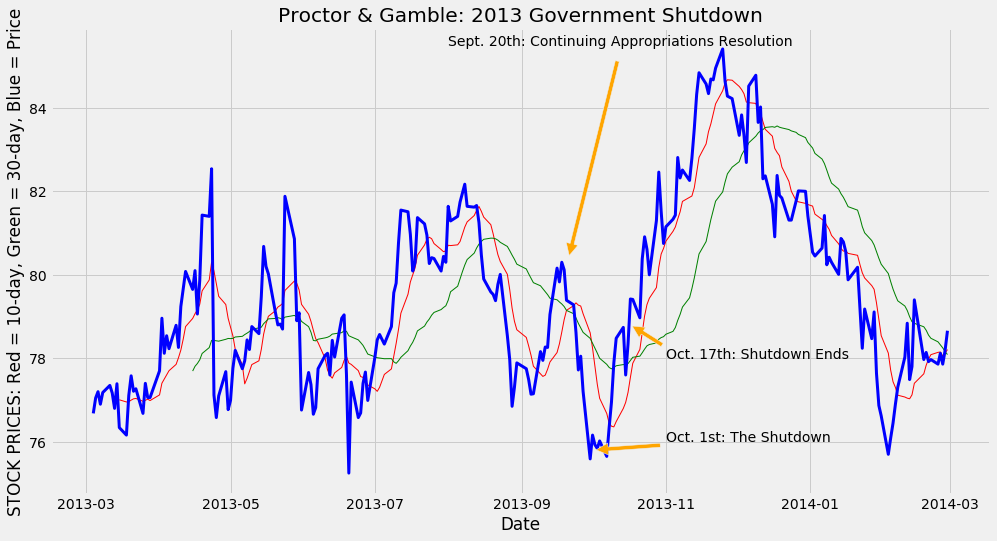

In [68]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

ax.annotate('Oct. 1st: The Shutdown', xy=('2013-10-01', 75.8), xytext=('2013-11-01', 76),
            arrowprops=dict(facecolor='orange', shrink=0.05),)

ax.annotate('Oct. 17th: Shutdown Ends', xy=('2013-10-17', 78.8), xytext=('2013-11-01', 78),
            arrowprops=dict(facecolor='orange', shrink=0.05),)

ax.annotate('Sept. 20th: Continuing Appropriations Resolution', xy=('2013-09-20', 80.2), xytext=('2013-08-01', 85.5),
            arrowprops=dict(facecolor='orange', shrink=0.05),)

MA_10, = plt.plot(short_date, ma1_pg, linewidth=1.0, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2_pg, linewidth=1.0, color="green", label="MA_30")
Price, = plt.plot(date, price_pg, linewidth=3.0, color="blue", label="Price")

plt.title("Proctor & Gamble: 2013 Government Shutdown")
plt.xlabel("Date")
plt.ylabel("STOCK PRICES: Red = 10-day, Green = 30-day, Blue = Price")


In [16]:
path_2 = r'/Users/Cottins/Documents/_Code/GS'
all_files_gs = glob.glob(os.path.join(path_2, '*.csv'))

df_from_each_file_gs = (pd.read_csv(f) for f in all_files_gs)

concatenated_df_gs = pd.concat(df_from_each_file_gs, ignore_index=True)
concatenated_df_gs.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,29-Dec-17,255.869995,256.649994,252.910004,254.759995,2519300,254.759995
1,28-Dec-17,256.980011,257.000000,255.100006,256.500000,1301000,256.500000
2,27-Dec-17,257.980011,257.980011,255.520004,255.949997,1567900,255.949997
3,26-Dec-17,258.190002,259.200012,256.000000,257.720001,1289300,257.720001
4,22-Dec-17,261.660004,262.140015,257.720001,258.970001,2100600,258.970001


In [17]:
concatenated_df_gs['Date'] = pd.to_datetime(concatenated_df_gs['Date'])
concatenated_df_gs = concatenated_df_gs.sort_values(by='Date')

In [18]:
govt_2013sd_df_gs = concatenated_df_gs[(concatenated_df_gs['Date'] > '2013-03-01') & (concatenated_df_gs['Date'] < '2014-03-01')]
govt_2013sd_df_gs.head(10)

,Date,Open,High,Low,Close,Volume,Adj Close
1217,2013-03-04,150.009995,152.470001,149.710007,152.179993,3209200,142.772385
1216,2013-03-05,153.449997,154.960007,152.800003,152.960007,4589300,143.504166
1215,2013-03-06,154.059998,155.050003,152.800003,154.130005,3593200,144.601852
1214,2013-03-07,154.699997,157.190002,154.500000,156.619995,3886300,146.937912
1213,2013-03-08,155.889999,156.229996,152.009995,152.979996,6615000,143.522934
1212,2013-03-11,152.449997,154.320007,152.360001,153.300003,3586400,143.823166
1211,2013-03-12,153.300003,153.800003,150.460007,151.850006,3432200,142.462845
1210,2013-03-13,152.029999,152.869995,150.580002,151.910004,3356400,142.519104
1209,2013-03-14,152.270004,154.339996,152.160004,154.020004,3886600,144.498672
1208,2013-03-15,151.350006,155.630005,151.300003,154.839996,7301200,145.267944


In [19]:
date = govt_2013sd_df_gs['Date'].tolist()
closep = govt_2013sd_df_gs['Close'].tolist()
highp = govt_2013sd_df_gs['High'].tolist()
lowp = govt_2013sd_df_gs['Low'].tolist()
openp = govt_2013sd_df_gs['Open'].tolist()
volume = govt_2013sd_df_gs['Volume'].tolist()

In [20]:
    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1
    
    #months = np.arange(0,13,1)    
    ma1_gs = moving_average(closep,MA1)
    ma2_gs = moving_average(closep,MA2)
    price_gs = closep
    start = len(date[MA2-1:])
    
    h_l = list(map(high_minus_low, highp, lowp))

Text(0,0.5,'STOCK PRICES: Red = 10-day, Green = 30-day, Blue = Price')

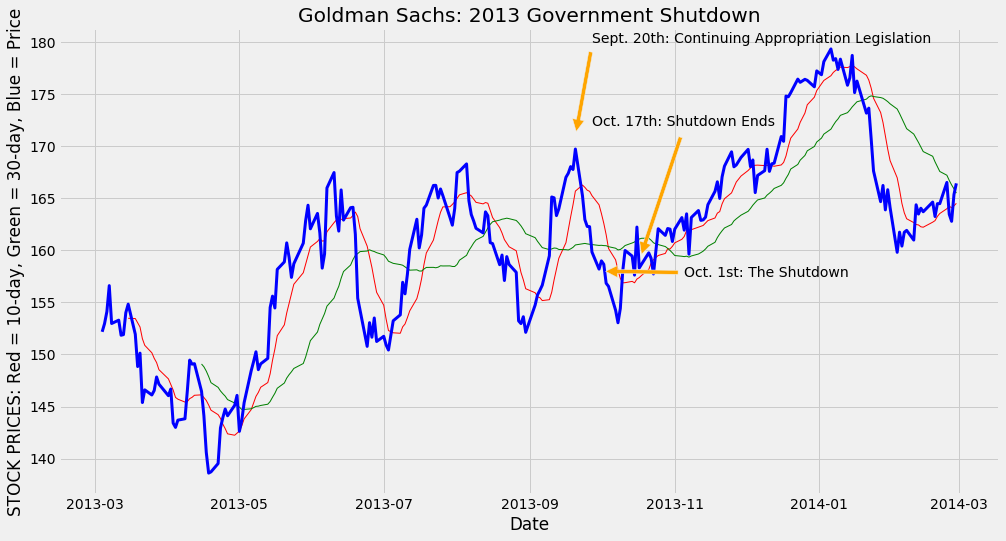

In [60]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
ax.annotate('Oct. 1st: The Shutdown', xy=('2013-10-01', 158), xytext=('2013-11-05', 157.5),
            arrowprops=dict(facecolor='Orange', shrink=0.05),)
ax.annotate('Oct. 17th: Shutdown Ends', xy=('2013-10-17', 159), xytext=('2013-09-27', 172),
            arrowprops=dict(facecolor='orange', shrink=0.05),)
ax.annotate('Sept. 20th: Continuing Appropriation Legislation', xy=('2013-09-20', 171), xytext=('2013-09-27', 180),
            arrowprops=dict(facecolor='orange', shrink=0.05),)

MA_10, = plt.plot(short_date, ma1_gs,linewidth=1.0, color="red", label="MA_10")
MA_30, = plt.plot(short_date_2, ma2_gs, linewidth=1.0, color="green", label="MA_30")
Price, = plt.plot(date, price_gs, linewidth=3.0, color="blue", label="Price")

plt.title("Goldman Sachs: 2013 Government Shutdown")
plt.xlabel("Date")
plt.ylabel("STOCK PRICES: Red = 10-day, Green = 30-day, Blue = Price")

In [244]:
closep_pg = govt_2013sd_df_pg['Close'].tolist()
closep_gs = govt_2013sd_df_gs['Close'].tolist()
ma3_pg = moving_average(closep_pg,MA3)
ma3_gs = moving_average(closep_gs,MA3)

Text(0,0.5,'(Red) = Proctor & Gamble, (Green) = Goldman Sachs')

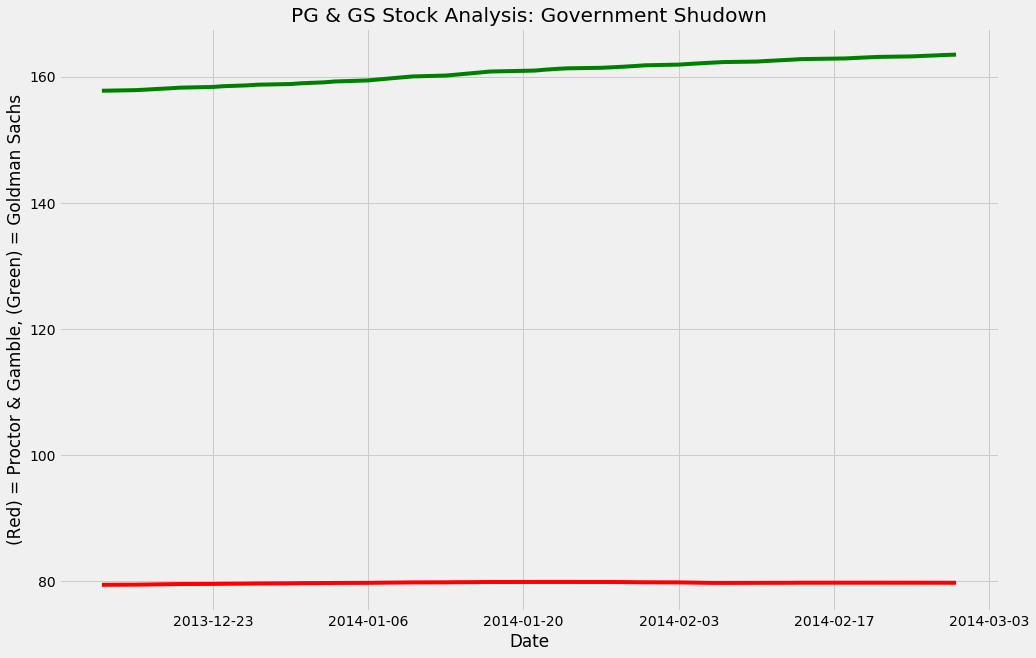

In [245]:
plt.figure(figsize=(15,10))

pg_MA50, = plt.plot(short_date_3, ma3_pg, color="red", label="PG")
gs_MA50, = plt.plot(short_date_3, ma3_gs, color="green", label="GS")

plt.title("PG & GS Stock Analysis: Government Shudown")
plt.xlabel("Date")
plt.ylabel("(Red) = Proctor & Gamble, (Green) = Goldman Sachs")

In [1]:
#url = "https://api.nytimes.com/svc/search/v2/articlesearch.json?"
#api_key = "164b73c522a8420c8e05343ef1da0a7e"

In [2]:
# Search for articles that mention "Hurricane Katrina"
#q = "Hurricane Katrina"
#begin_date = '20050823'
#end_date = '20060401'

In [3]:
#query = url + "api-key=" + api_key + "&q=" + q +'&begin_date=' + begin_date + '&end_date=' + end_date
#print(query)

In [25]:
#articles = requests.get(query).json()

In [4]:
#print(json.dumps(articles, indent=4, sort_keys=True))

In [7]:
#with open('nyt.json', 'w') as outfile:
    #json.dump(articles, outfile, indent=4, sort_keys=True)

In [8]:
#for article in articles["response"]["docs"]:
    #print(article)

In [29]:
article_list = [article for article in articles["response"]["docs"]]

In [9]:
#article_list

In [10]:
#abstracts = []
#for article in article_list:
#    abstracts.append(article.get('abstract'))

#print(abstracts)

In [11]:
#snippets = []
#for article in article_list:
#    snippets.append(article.get('snippet'))
#    print(snippets)

In [34]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [45]:
analyzer = SentimentIntensityAnalyzer()

In [53]:
compound = analyzer.polarity_scores(abstracts[0])["compound"]
pos = analyzer.polarity_scores(abstracts[0])["pos"]
neg = analyzer.polarity_scores(abstracts[0])["neg"]
neu = analyzer.polarity_scores(abstracts[0])["neu"]

compound_list.append(compound)
positive_list.append(pos)
neutral_list.append(neu)
negative_list.append(neg)

print(f"Source: {url}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

Source: https://api.nytimes.com/svc/search/v2/articlesearch.json?
Compound: -0.887
Positive: 0.083
Neutral: 0.772
Negative: 0.145


In [54]:
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

In [56]:
compound = analyzer.polarity_scores(snippets[0])["compound"]
pos = analyzer.polarity_scores(snippets[0])["pos"]
neg = analyzer.polarity_scores(snippets[0])["neg"]
neu = analyzer.polarity_scores(snippets[0])["neu"]

compound_list.append(compound)
positive_list.append(pos)
neutral_list.append(neu)
negative_list.append(neg)

print(f"Source: {url}")
print(f"Compound: {np.mean(compound_list)}")
print(f"Positive: {np.mean(positive_list)}")
print(f"Neutral: {np.mean(neutral_list)}")
print(f"Negative: {np.mean(negative_list)}")

Source: https://api.nytimes.com/svc/search/v2/articlesearch.json?
Compound: -0.79365
Positive: 0.0415
Neutral: 0.759
Negative: 0.1995
